## VISUALISING DATA – nba.csv

**This task picks up from where we left off in our previous task 'Challenge Yourself - NBA Practise Task', and uses the CleanNBA dataset.**

In [1]:
#import the relevant libraries - you will need pandas and numpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read the csv file and assign it to a dataframe 
  #download the file and ensure that it is in the same folder as this ipynb file
df = pd.read_csv('CleanNBA.csv')

df

,Team,Number,Position,Age,Weight,HeightInInches,Salary,Position_C,Position_PF,Position_PG,Position_SF,Position_SG
0,Philadelphia 76ers,8.0,C,20.0,275.0,83,4.582680e+06,1,0,0,0,0
1,Detroit Pistons,3.0,SF,20.0,245.0,79,2.841960e+06,0,0,0,1,0
2,Minnesota Timberwolves,32.0,C,20.0,244.0,84,5.703600e+06,1,0,0,0,0
3,Indiana Pacers,33.0,PF,20.0,243.0,83,2.357760e+06,0,1,0,0,0
4,New York Knicks,6.0,PF,20.0,240.0,87,4.131720e+06,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
328,Milwaukee Bucks,21.0,PG,29.0,217.0,78,6.600000e+06,0,0,1,0,0
329,Toronto Raptors,5.0,SF,29.0,212.0,80,1.360000e+07,0,0,0,1,0
330,Washington Wizards,15.0,SF,29.0,205.0,76,2.006000e+05,0,0,0,1,0
331,Memphis Grizzlies,4.0,PG,29.0,180.0,74,4.842684e+06,0,0,1,0,0


In [3]:
#Display the shape of the data - how many rows and columns  do you have?
df.shape

(333, 12)

In [4]:
#Display the head of the document - this will give you an idea of what the contents of the file looks like
#The first five rows are displayed
df.head()

,Team,Number,Position,Age,Weight,HeightInInches,Salary,Position_C,Position_PF,Position_PG,Position_SF,Position_SG
0,Philadelphia 76ers,8.0,C,20.0,275.0,83,4582680.0,1,0,0,0,0
1,Detroit Pistons,3.0,SF,20.0,245.0,79,2841960.0,0,0,0,1,0
2,Minnesota Timberwolves,32.0,C,20.0,244.0,84,5703600.0,1,0,0,0,0
3,Indiana Pacers,33.0,PF,20.0,243.0,83,2357760.0,0,1,0,0,0
4,New York Knicks,6.0,PF,20.0,240.0,87,4131720.0,0,1,0,0,0


In [5]:
#Display the last 5 lines of your file
#What problem is immediateley obvious when looking at the last five lines of the file?
df.tail()

,Team,Number,Position,Age,Weight,HeightInInches,Salary,Position_C,Position_PF,Position_PG,Position_SF,Position_SG
328,Milwaukee Bucks,21.0,PG,29.0,217.0,78,6.600000e+06,0,0,1,0,0
329,Toronto Raptors,5.0,SF,29.0,212.0,80,1.360000e+07,0,0,0,1,0
330,Washington Wizards,15.0,SF,29.0,205.0,76,2.006000e+05,0,0,0,1,0
331,Memphis Grizzlies,4.0,PG,29.0,180.0,74,4.842684e+06,0,0,1,0,0
332,Los Angeles Lakers,23.0,SG,29.0,175.0,73,7.000000e+06,0,0,0,0,1


In [6]:
#Examine the different datatypes - we need to understand the data types as it effects what we can do with the data
df.dtypes

Team               object
Number            float64
Position           object
Age               float64
Weight            float64
HeightInInches      int64
Salary            float64
Position_C          int64
Position_PF         int64
Position_PG         int64
Position_SF         int64
Position_SG         int64
dtype: object

When we look at the output above, you can observe that we have 2 columns with object data, Team and Position. Having these 2 columns with Object data at this stage can be very useful for our charts. We can drop them later.

In [7]:
#Count the number of values in each column
df.isnull().sum()

Team              0
Number            0
Position          0
Age               0
Weight            0
HeightInInches    0
Salary            0
Position_C        0
Position_PF       0
Position_PG       0
Position_SF       0
Position_SG       0
dtype: int64

## Visualising the Data  

Remember to add the relevant libraries at the top of the notebook

In [8]:
#Display the first 5 rows of the dataframe
df.head()

,Team,Number,Position,Age,Weight,HeightInInches,Salary,Position_C,Position_PF,Position_PG,Position_SF,Position_SG
0,Philadelphia 76ers,8.0,C,20.0,275.0,83,4582680.0,1,0,0,0,0
1,Detroit Pistons,3.0,SF,20.0,245.0,79,2841960.0,0,0,0,1,0
2,Minnesota Timberwolves,32.0,C,20.0,244.0,84,5703600.0,1,0,0,0,0
3,Indiana Pacers,33.0,PF,20.0,243.0,83,2357760.0,0,1,0,0,0
4,New York Knicks,6.0,PF,20.0,240.0,87,4131720.0,0,1,0,0,0


### Create a Correlation Matrix

In [9]:
#Create a Correlation Matrix and save the output to a variable called correlationMatrix
#In earlier versions of Jupyter Notebooks the .corr() method automatically disregarded object type data.

#Now we must create a temporary data frame with the numeric data first
temp_df = df.iloc[:, [1,3,4,5,6,7,8,9,10]]

#Use the temporary data frame to create correlation matrix
correlationMatrix = temp_df.corr()

#Display the contents of the variable
correlationMatrix

,Number,Age,Weight,HeightInInches,Salary,Position_C,Position_PF,Position_PG,Position_SF
Number,1.000000,0.024200,0.185131,0.259971,-0.106469,0.130391,0.172193,-0.229462,0.014624
Age,0.024200,1.000000,0.094195,0.010894,0.305954,0.086266,0.023059,-0.018116,0.010730
Weight,0.185131,0.094195,1.000000,0.834593,0.115702,0.574405,0.369228,-0.607754,-0.010199
HeightInInches,0.259971,0.010894,0.834593,1.000000,0.031797,0.552360,0.378127,-0.683539,0.055067
Salary,-0.106469,0.305954,0.115702,0.031797,1.000000,0.051285,-0.028268,0.048912,-0.007190
Position_C,0.130391,0.086266,0.574405,0.552360,0.051285,1.000000,-0.238248,-0.223548,-0.219315
Position_PF,0.172193,0.023059,0.369228,0.378127,-0.028268,-0.238248,1.000000,-0.263446,-0.258457
Position_PG,-0.229462,-0.018116,-0.607754,-0.683539,0.048912,-0.223548,-0.263446,1.000000,-0.242510
Position_SF,0.014624,0.010730,-0.010199,0.055067,-0.007190,-0.219315,-0.258457,-0.242510,1.000000


You will observe that the correlationMatrix above can only show relationships between numerical columns. 

### Create a Heatmap

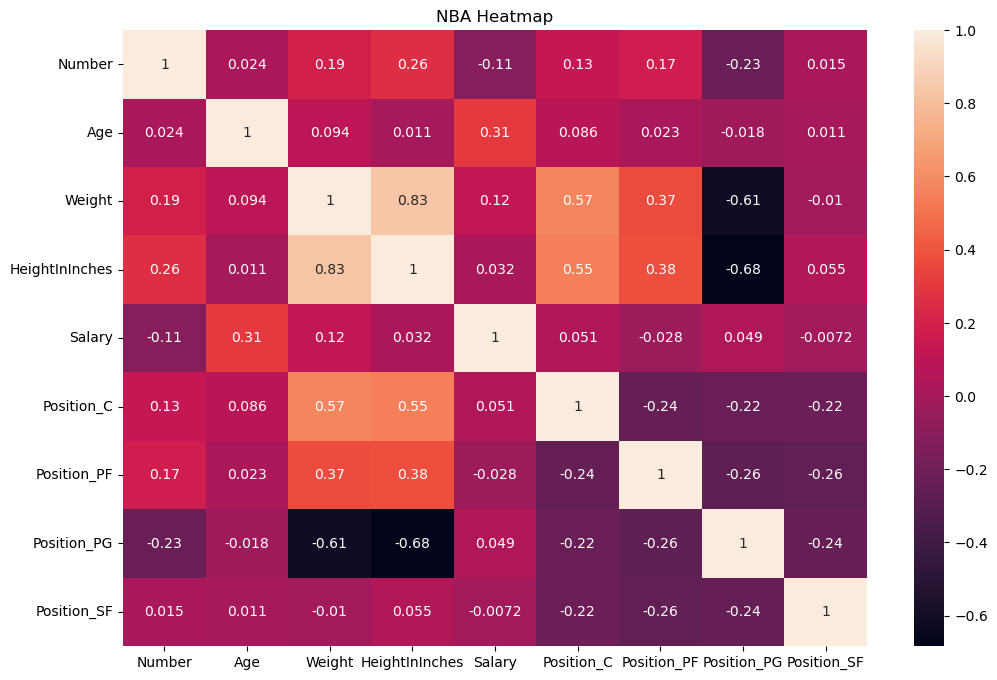

In [10]:
#Using the correlation matrix you just created produce a heatmap. Ensure that your heatmap has annotations.

#Set the plot size to 12 by 8
plt.figure(figsize=(12,8))

#Create a basic heatmap using the correlation matrix data - annot=True will display values in the map
#sns.heatmap(correlationMatrix)

#Annot=True will display values in the map, vmin and vmas enable you to change the scale and colours
sns.heatmap(correlationMatrix, annot=True, cbar_kws={"orientation":"vertical"})

#Add a title
plt.title("NBA Heatmap")

#Save a copy of the graph as a png
#plt.savefig("heatmap.png", dpi=300)

#Show the plot
plt.show()

### Analysing a Subset of your Dataframe

You do not have to create your Correlation Matrix and Heatmap based on the whole dataset. You could select certain features/columns of interest that you wish to assess

In [11]:
#Create a subset of df called new_df. It should contain the columns Weight, Position_PG, Age, HeightInInches
new_df = df[['Weight', 'Position_PG', 'Age', 'HeightInInches']]
new_df

,Weight,Position_PG,Age,HeightInInches
0,275.0,0,20.0,83
1,245.0,0,20.0,79
2,244.0,0,20.0,84
3,243.0,0,20.0,83
4,240.0,0,20.0,87
...,...,...,...,...
328,217.0,1,29.0,78
329,212.0,0,29.0,80
330,205.0,0,29.0,76
331,180.0,1,29.0,74


In [12]:
#Create a Correlation Matrix using new_df and save the output to a variable
correlationMatrix = new_df.corr()

#Display the contents of the variable
correlationMatrix

,Weight,Position_PG,Age,HeightInInches
Weight,1.000000,-0.607754,0.094195,0.834593
Position_PG,-0.607754,1.000000,-0.018116,-0.683539
Age,0.094195,-0.018116,1.000000,0.010894
HeightInInches,0.834593,-0.683539,0.010894,1.000000


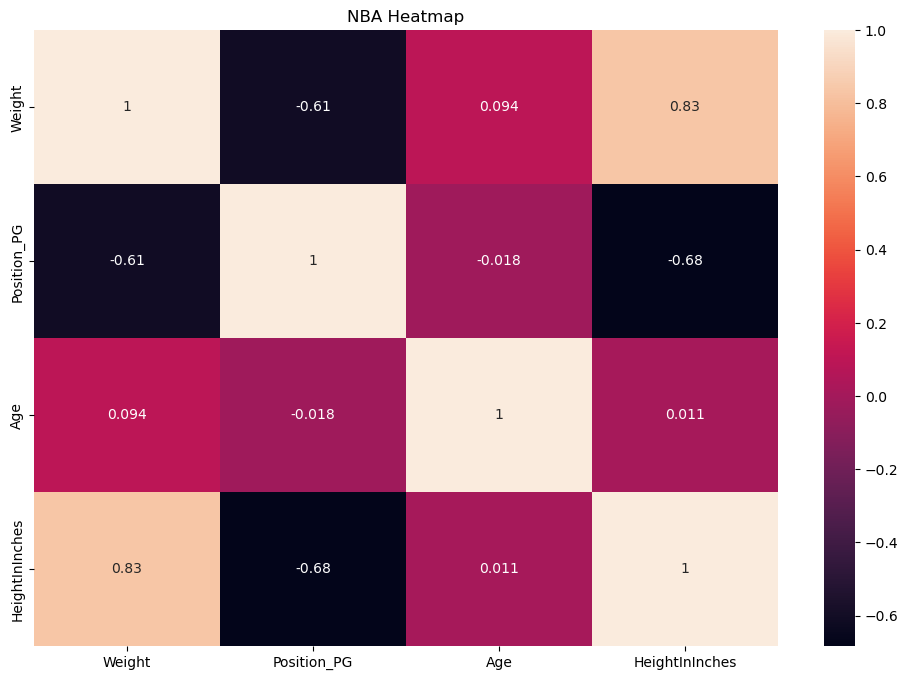

In [13]:
#Using the correlation matrix you just created produce a heatmap. Ensure that your heatmap has annotations.

#Set the plot size to 12 by 8
plt.figure(figsize=(12,8))

#Create a basic heatmap using the correlation matrix data - annot=True will display values in the map
#sns.heatmap(correlationMatrix)

#Annot=True will display values in the map, vmin and vmas enable you to change the scale and colours
sns.heatmap(correlationMatrix, annot=True, cbar_kws={"orientation":"vertical"})

#Add a title
plt.title("NBA Heatmap")

#Save a copy of the graph as a png
#plt.savefig("subset_heatmap.png", dpi=300)

#Show the plot
plt.show()

### Box and Whisker Chart  

Using df again, create a box and whisker chart to show Salary for the New Orleans Pelicans, Chicago Bulls and Milwaukee Bucks

In [14]:
#Count the instances of each Team in your dataset
df['Team'].value_counts()

Team
New Orleans Pelicans      17
BC                        15
Utah Jazz                 15
Milwaukee Bucks           14
Brooklyn Nets             14
Denver Nuggets            13
Toronto Raptors           13
Philadelphia 76ers        13
Portland Trail Blazers    13
Memphis Grizzlies         12
Detroit Pistons           12
Indiana Pacers            12
Charlotte Hornets         12
Orlando Magic             12
Sacramento Kings          12
Minnesota Timberwolves    11
New York Knicks           11
Oklahoma City Thunder     11
Houston Rockets           10
Los Angeles Clippers      10
Los Angeles Lakers        10
Chicago Bulls             10
Phoenix Suns              10
Golden State Warriors      9
Atlanta Hawks              8
Washington Wizards         8
Dallas Mavericks           7
Cleveland Cavaliers        7
San Antonio Spurs          6
Miami Heat                 6
Name: count, dtype: int64

In [15]:
#Perform a series of calculations to get the Salary for people who play for the following teams
#New Orleans Pelicans, Chicago Bulls and Milwaukee Bucks

salaryNOP = df.loc[(df.Team == 'New Orleans Pelicans') ]['Salary']
salaryCB = df.loc[(df.Team == 'Chicago Bulls') ]['Salary']
salaryMB = df.loc[(df.Team == 'Milwaukee Bucks') ]['Salary']

salaryNOP

67      7070730.0
92       169883.0
172     1015421.0
177      845059.0
180    10595507.0
196      845059.0
216     1100602.0
222    10734586.0
254       55722.0
256    15514031.0
273     3036927.0
279     4389607.0
281     8500000.0
289     3382023.0
308     9213483.0
323     2850000.0
325     1320000.0
Name: Salary, dtype: float64

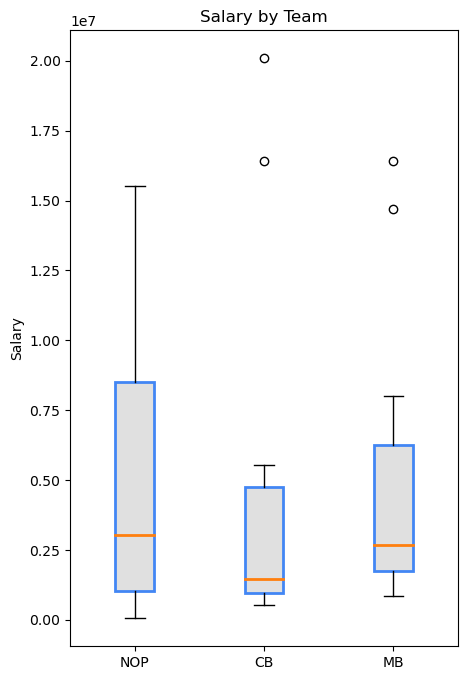

In [16]:
#Create the box and whisker chart to show Salary for the New Orleans Pelicans, Chicago Bulls and Milwaukee Bucks

plt.figure(figsize=(5,8), dpi=100)

plt.style.use('default')

#patch_artist is a facecolour
bp = plt.boxplot([salaryNOP, salaryCB, salaryMB], labels=['NOP','CB','MB'], patch_artist=True, medianprops={'linewidth': 2})

plt.title('Salary by Team')
plt.ylabel('Salary')

#We can style the boxes
for box in bp['boxes']:
    # change outline color
    box.set(color='#4286f4', linewidth=2)
    # change fill color to grey - but you must set patch_artist property to True - see above
    box.set(facecolor = '#e0e0e0' )
    # change hatch
    #box.set(hatch = '/')
    
plt.show()

### Bar Chart
Create a bar chart to show the number of players in the dataset who play in each of the five positions

In [17]:
df.head()

,Team,Number,Position,Age,Weight,HeightInInches,Salary,Position_C,Position_PF,Position_PG,Position_SF,Position_SG
0,Philadelphia 76ers,8.0,C,20.0,275.0,83,4582680.0,1,0,0,0,0
1,Detroit Pistons,3.0,SF,20.0,245.0,79,2841960.0,0,0,0,1,0
2,Minnesota Timberwolves,32.0,C,20.0,244.0,84,5703600.0,1,0,0,0,0
3,Indiana Pacers,33.0,PF,20.0,243.0,83,2357760.0,0,1,0,0,0
4,New York Knicks,6.0,PF,20.0,240.0,87,4131720.0,0,1,0,0,0


In [18]:
#Create a range of calculations to count the number of players in the dataset who play in each of the five positions

##Calculating numbers playing in each Position
posSG = df.Position_SG[(df['Position_SG'] == 1) ].count()
posSF = df.Position_SG[(df['Position_SF'] == 1) ].count()
posPG = df.Position_SG[(df['Position_PG'] == 1) ].count()
posPF = df.Position_SG[(df['Position_PF'] == 1) ].count()
posC = df.Position_SG[(df['Position_C'] == 1) ].count()

#Assign your results to a new list
positionValues = [posSG, posSF, posPG, posPF, posC]
positionValues

[74, 64, 66, 73, 56]

In [19]:
#Assign the positions to a list
positionsList = ['SG', 'SF', 'PG', 'PF', 'C']
positionsList

['SG', 'SF', 'PG', 'PF', 'C']

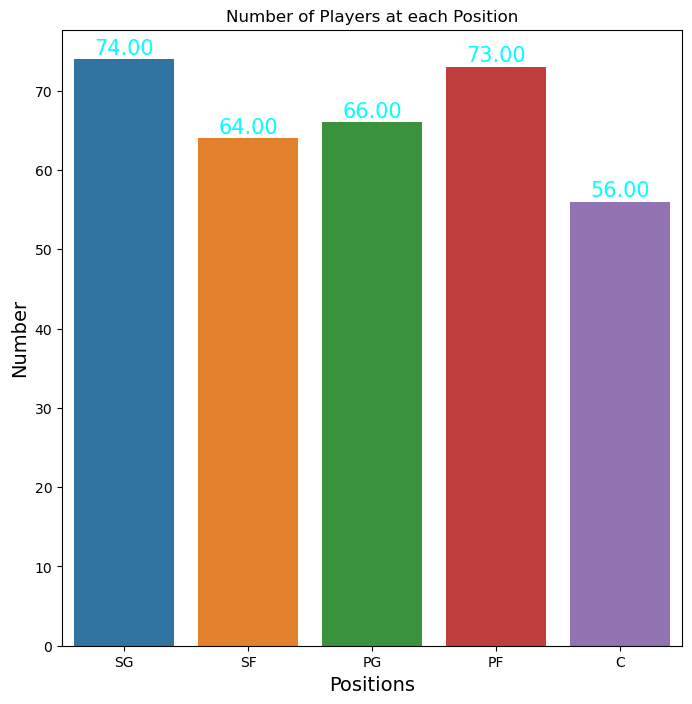

In [20]:
#Create the bar chart to show the number of players in the dataset who play in each of the five positions

# Defining the plot size
plt.figure(figsize=(8, 8))

#Using the lists for your chart - just remember to remove the data parameter
plots=sns.barplot(x=positionsList,y=positionValues)

# Iterrating over the bars one-by-one to annotate
for bar in plots.patches:
  # Using Matplotlib's annotate function and passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.2f'), (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha = 'center', va = 'center', 
                   size=15,xytext = (0, 8), color='cyan',
                   textcoords = 'offset points')
# Setting the label for x-axis    
plt.xlabel("Positions", size=14)
# Setting the label for y-axis
plt.ylabel("Number", size=14)
# Setting the title for the graph
plt.title("Number of Players at each Position")
# Fianlly showing the plot
plt.show()

### A Scatterplot to show Weight (x axis) and Height (y axis) in relation to Position played

In one of our previous exercises, where we Analysed and Pre-Processed the NBA dataset we used get dummies to change the Position column from object to numerical data. As a result the 5 positions were transformed into 5 columns contains 1s and 0s. The next logical step would be to drop the original Position column.  

In the chart above we used the 5 new position columns to count the number of players in each position. However, in this scatterplit chart that we are about to create, it would be easier to use the original Position column.

After we have produced this chart, and before we would use our machine learning algorithm, we could drop the Position column.

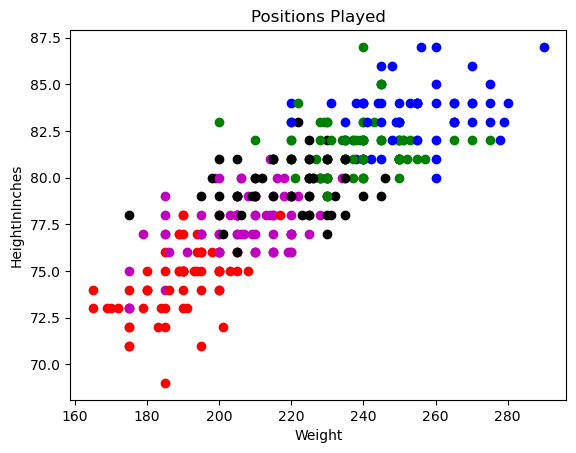

In [21]:
#Create the scatter chart

# create color dictionary
colors = {'PG':'r', 'PF':'g', 'C':'b', 'SG':'m', 'SF':'k'}

# create a figure and axis
fig, ax = plt.subplots()

# plot each data-point
for i in range(len(df['Weight'])):
    ax.scatter(df['Weight'][i], df['HeightInInches'][i],color=colors[df['Position'][i]])

# set a title and labels
ax.set_title('Positions Played')
ax.set_xlabel('Weight')
ax.set_ylabel('HeightInInches')

plt.show()